🔍 Validation Metrics:
              precision    recall  f1-score   support

           5       0.74      0.82      0.78        55
           6       0.83      0.69      0.75        71
           7       0.60      0.65      0.62        60
           8       0.66      0.67      0.67        61

    accuracy                           0.70       247
   macro avg       0.71      0.71      0.71       247
weighted avg       0.71      0.70      0.71       247

✅ Validation Accuracy: 0.7044534412955465

📊 Test Metrics:
              precision    recall  f1-score   support

           5       0.84      0.87      0.86        79
           6       0.79      0.77      0.78        69
           7       0.64      0.68      0.66        74
           8       0.73      0.69      0.71        87

    accuracy                           0.75       309
   macro avg       0.75      0.75      0.75       309
weighted avg       0.75      0.75      0.75       309

✅ Test Accuracy: 0.7508090614886731


/Users/lipisinghal/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


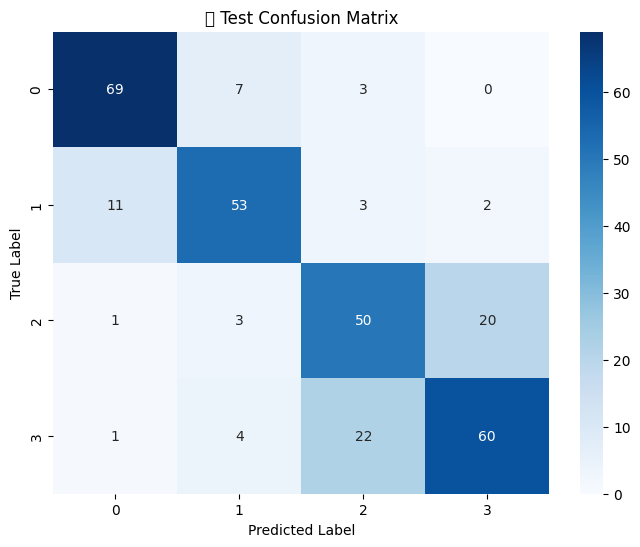

In [1]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


# Function to extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))  # Resize to standard size
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Main paths
main_dir = "Split_Data"
data = []
labels = []

# Load image data and labels
for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                # Extract pH value from filename
                match = re.search(r'pH(\d+)', file)
                if match:
                    pH = int(match.group(1))
                    features = extract_features(full_path)
                    if features is not None:
                        data.append(features)
                        labels.append(pH)
                else:
                    print(f"Could not extract pH from: {file}")

# Convert to arrays
X = np.array(data)
y = np.array(labels)

# Train/validation/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
}

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Validation evaluation
val_preds = clf.predict(X_val)
print("🔍 Validation Metrics:")
print(classification_report(y_val, val_preds))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

# Test evaluation
test_preds = clf.predict(X_test)
print("\n📊 Test Metrics:")
print(classification_report(y_test, test_preds))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("🧪 Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [2]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_rf = grid_search.best_estimator_

val_preds_grid = best_rf.predict(X_val)
val_acc_grid = accuracy_score(y_val, val_preds_grid)
print("🔍 Grid Search RF - Validation Accuracy:", val_acc_grid)

test_preds_grid = best_rf.predict(X_test)
test_acc_grid = accuracy_score(y_test, test_preds_grid)
print("📊 Grid Search RF - Test Accuracy:", test_acc_grid)

print("📄 Grid Search RF - Test Classification Report:")
print(classification_report(y_test, test_preds_grid))


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
🔍 Grid Search RF - Validation Accuracy: 0.7246963562753036
📊 Grid Search RF - Test Accuracy: 0.7508090614886731
📄 Grid Search RF - Test Classification Report:
              precision    recall  f1-score   support

           5       0.86      0.85      0.85        79
           6       0.80      0.83      0.81        69
           7       0.64      0.65      0.64        74
           8       0.71      0.69      0.70        87

    accuracy                           0.75       309
   macro avg       0.75      0.75      0.75       309
weighted avg       0.75      0.75      0.75       309



📦 Using XGBoost Classifier


/Users/lipisinghal/.pyenv/versions/3.10.13/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:30:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 Validation Metrics:
              precision    recall  f1-score   support

           5       0.77      0.85      0.81        55
           6       0.81      0.70      0.75        71
           7       0.59      0.68      0.63        60
           8       0.72      0.64      0.68        61

    accuracy                           0.72       247
   macro avg       0.72      0.72      0.72       247
weighted avg       0.72      0.72      0.72       247

✅ Validation Accuracy: 0.7165991902834008

📊 Test Metrics:
              precision    recall  f1-score   support

           5       0.86      0.85      0.85        79
           6       0.78      0.83      0.80        69
           7       0.64      0.66      0.65        74
           8       0.73      0.69      0.71        87

    accuracy                           0.75       309
   macro avg       0.75      0.76      0.75       309
weighted avg       0.75      0.75      0.75       309

✅ Test Accuracy: 0.7540453074433657


/var/folders/jx/8n7khtqd3kj995b8dsj6j8bw0000gn/T/ipykernel_14303/565041358.py:105: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/lipisinghal/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


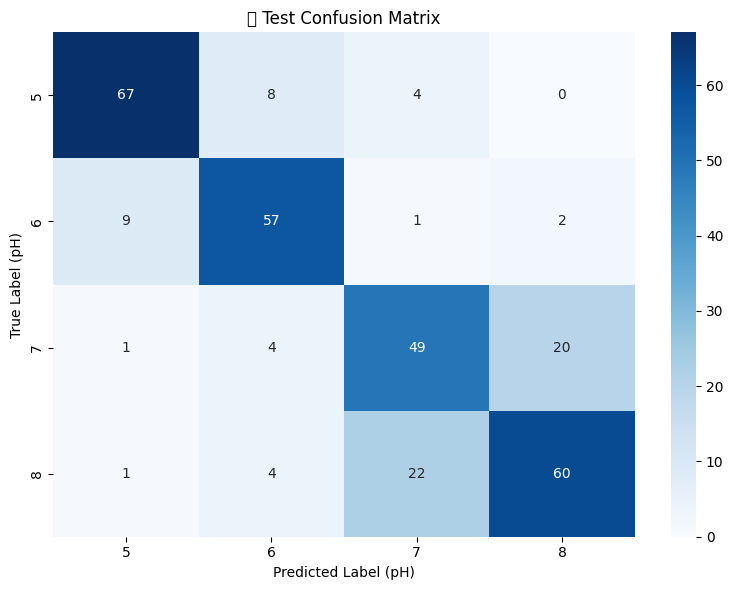

In [4]:

import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Try importing XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    print("❌ XGBoost not available. Using RandomForest instead.")
    xgb_available = False

# Function to extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))  # Resize to standard size
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Paths
main_dir = "Split_Data"
data = []
labels = []

# Load data
for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                match = re.search(r'pH(\d+)', file)
                if match:
                    pH = int(match.group(1))
                    features = extract_features(full_path)
                    if features is not None:
                        data.append(features)
                        labels.append(pH)
                else:
                    print(f"Could not extract pH from: {file}")

# Convert to arrays
X = np.array(data)
y_raw = np.array(labels)

# Encode labels to start from 0
le = LabelEncoder()
y = le.fit_transform(y_raw)

# Split data
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Choose model
if xgb_available:
    clf = XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    print("📦 Using XGBoost Classifier")
else:
    clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    print("🌲 Using RandomForest Classifier")

# Fit
clf.fit(X_train, y_train)

# Validation metrics
val_preds = clf.predict(X_val)
print("\n🔍 Validation Metrics:")
print(classification_report(y_val, val_preds, target_names=le.classes_.astype(str)))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

# Test metrics
test_preds = clf.predict(X_test)
print("\n📊 Test Metrics:")
print(classification_report(y_test, test_preds, target_names=le.classes_.astype(str)))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("🧪 Test Confusion Matrix")
plt.xlabel("Predicted Label (pH)")
plt.ylabel("True Label (pH)")
plt.tight_layout()
plt.show()


🔍 Validation Metrics:
              precision    recall  f1-score   support

           5       0.73      0.87      0.79        55
           6       0.84      0.66      0.74        71
           7       0.60      0.67      0.63        60
           8       0.71      0.67      0.69        61

    accuracy                           0.71       247
   macro avg       0.72      0.72      0.71       247
weighted avg       0.72      0.71      0.71       247

✅ Validation Accuracy: 0.7125506072874493

📊 Test Metrics:
              precision    recall  f1-score   support

           5       0.79      0.84      0.81        79
           6       0.80      0.75      0.78        69
           7       0.66      0.70      0.68        74
           8       0.75      0.70      0.73        87

    accuracy                           0.75       309
   macro avg       0.75      0.75      0.75       309
weighted avg       0.75      0.75      0.75       309

✅ Test Accuracy: 0.7475728155339806


/Users/lipisinghal/.pyenv/versions/3.10.13/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


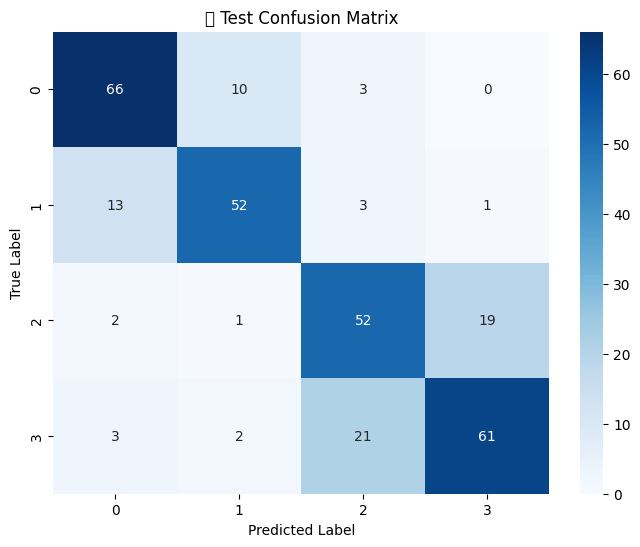

In [5]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Extract time in hours from folder path (e.g., '0 hr', '24 hr', etc.)
def extract_time_from_path(path):
    match = re.search(r'(\d+)\s*hr', path)
    return int(match.group(1)) if match else None

# Main paths
main_dir = "Split_Data"
data = []
labels = []

# Load image data and labels
for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                # Extract pH value from filename
                pH_match = re.search(r'pH(\d+)', file)
                if not pH_match:
                    print(f"⚠️ Could not extract pH from: {file}")
                    continue
                pH = int(pH_match.group(1))

                # Extract time from folder structure
                time = extract_time_from_path(root)
                if time is None:
                    print(f"⚠️ Could not extract time from path: {root}")
                    continue

                # Extract histogram features
                features = extract_features(full_path)
                if features is not None:
                    # Append time as an additional feature
                    features_with_time = np.append(features, time)
                    data.append(features_with_time)
                    labels.append(pH)

# Convert to arrays
X = np.array(data)
y = np.array(labels)

# Train/val/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Validation evaluation
val_preds = clf.predict(X_val)
print("🔍 Validation Metrics:")
print(classification_report(y_val, val_preds))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

# Test evaluation
test_preds = clf.predict(X_test)
print("\n📊 Test Metrics:")
print(classification_report(y_test, test_preds))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("🧪 Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_sam

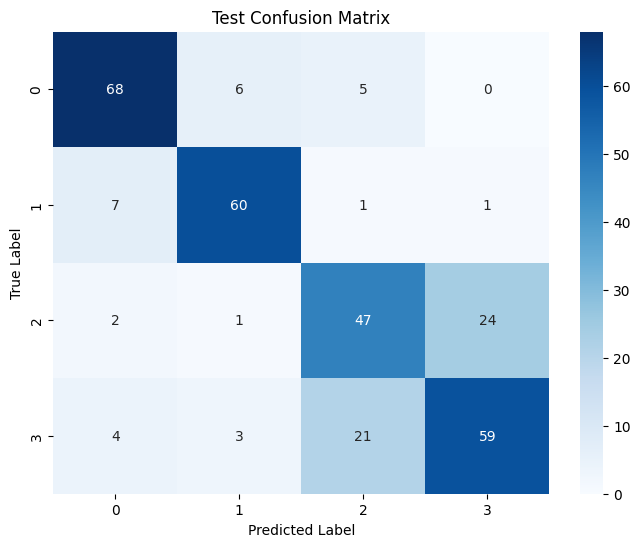

In [6]:
import os
import cv2
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Extract color histogram features
def extract_features(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    image = cv2.resize(image, (128, 128))
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 8, 8],
                        [0, 180, 0, 256, 0, 256])
    return cv2.normalize(hist, hist).flatten()

# Extract time in hours from folder path (e.g., '0 hr', '24 hr', etc.)
def extract_time_from_path(path):
    match = re.search(r'(\d+)\s*hr', path)
    return int(match.group(1)) if match else None

# Load image data and labels
main_dir = "Split_Data"
data = []
labels = []

for phase in ["train", "test"]:
    phase_path = os.path.join(main_dir, phase)
    for root, dirs, files in os.walk(phase_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                full_path = os.path.join(root, file)

                # Extract pH
                pH_match = re.search(r'pH(\d+)', file)
                if not pH_match:
                    print(f"⚠️ Could not extract pH from: {file}")
                    continue
                pH = int(pH_match.group(1))

                # Extract time
                time = extract_time_from_path(root)
                if time is None:
                    print(f"⚠️ Could not extract time from: {root}")
                    continue

                # Extract features
                features = extract_features(full_path)
                if features is not None:
                    features_with_time = np.append(features, time)
                    data.append(features_with_time)
                    labels.append(pH)

# Convert to arrays
X = np.array(data)
y = np.array(labels)

# Train/val/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

# GridSearchCV for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("\n✅ Best Parameters from Grid Search:")
print(grid_search.best_params_)

# Evaluate on validation set
val_preds = best_model.predict(X_val)
print("\n📊 Validation Metrics:")
print(classification_report(y_val, val_preds))
print("✅ Validation Accuracy:", accuracy_score(y_val, val_preds))

# Final test set evaluation
test_preds = best_model.predict(X_test)
print("\n🧪 Test Metrics:")
print(classification_report(y_test, test_preds))
print("✅ Test Accuracy:", accuracy_score(y_test, test_preds))

# Confusion matrix
conf_mat = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [4]:
pip install optree


  Using cached optree-0.15.0-cp310-cp310-macosx_11_0_arm64.whl (329 kB)
Note: you may need to restart the kernel to use updated packages.
